# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [1]:
#Standard setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [2]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  2793k      0 --:--:-- --:--:-- --:--:-- 2793k
Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [7]:
ratings_df[(ratings_df["userId"] == 'm500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp




Lets practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [8]:
# add your solution here
ratings_df["userId"].nunique()

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [9]:
# add your solutions here
grouped = ratings_df[["userId", "rating"]].groupby(["userId"])
grouped.agg(np.mean)

,rating
userId,
u1,4.366379
u10,3.278571
u100,3.945946
u101,3.557377
u102,3.357143
...,...
u95,4.062500
u96,3.884615
u97,4.194444


In [10]:
ratings_df.groupby(["userId"]).mean()["rating"].loc["u200"]

3.809880239520958

## Task 3. What is the average number of ratings per-user? 

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [11]:
# add your solution here
grouped_1 = ratings_df[["userId", "rating"]].groupby(["userId"]).count()
grouped_1.mean()

rating    165.304918
dtype: float64

## Analysing users's preferences.

Lets try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Lets do this for userId 556.


In [12]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


This user is pretty into adventure/fantasies. 

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u556 and u7 rated positively ($\geq 4$)? 

 - What percentage of ALL of u556's ratings are positive ratings ($\geq 4$)  AND for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [13]:
# add your solution here
u556 = pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False).reset_index()

u7 = pd.merge(
    ratings_df[ratings_df["userId"]=='u7'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False).reset_index()

u556_fan_4 = np.sum([u556["genres"].str.contains("Fantasy") * u556["rating"]>=4])
u7_fan_4 = np.sum([u7["genres"].str.contains("Fantasy") * u7["rating"]>=4])

percentage = u556_fan_4 / len(u556)

print("u556 has rated", u556_fan_4, "fantasy movies positively.")
print("u7 has rated", u7_fan_4, "fantasy movies positively.")
print("Percentage of", percentage, "of all u556's ratings are positive and are for fantasy movies.")

u556 has rated 22 fantasy movies positively.
u7 has rated 11 fantasy movies positively.
Percentage of 0.6875 of all u556's ratings are positive and are for fantasy movies.


# Part B. Popularity-based Recomendation

Now lets examine the ratings of movies. 

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [14]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


##Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints: 
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

You will need to analyse this graph in the quiz.

In [15]:
# add your solution here
task5 = groupingCountSeries.reset_index()
task5 = pd.merge(
    movies_df["movieId"],
    task5,
    on=["movieId"]
)
task5

,movieId,rating
0,m1,215
1,m2,110
2,m3,52
3,m4,7
4,m5,49
...,...,...
9719,m193581,1
9720,m193583,1
9721,m193585,1
9722,m193587,1


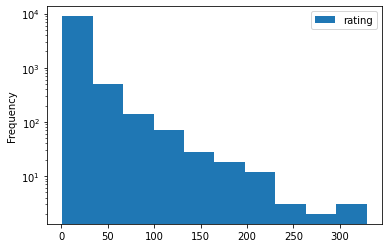

In [16]:
task5.plot(kind="hist", logy=True)
plt.savefig("img")


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings?

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [17]:
# add your solution here
averages = pd.merge(
    ratings_df[["movieId", "rating"]].groupby(["movieId"]).agg(np.mean).sort_values(by="rating", ascending=False),
    groupingCountSeries,
    on=["movieId"]
)

movies_rt = pd.merge(
    averages,
    movies_df[["title", "movieId"]],
    on=["movieId"]
)

movies_rt.rename(columns={'rating_x':'rating', 'rating_y':'number of rates'}, inplace=True)

movies_rt

,movieId,rating,number of rates,title
0,m167064,5.0,1,I Am Not Your Negro (2017)
1,m138966,5.0,1,Nasu: Summer in Andalusia (2003)
2,m53578,5.0,1,"Valet, The (La doublure) (2006)"
3,m139640,5.0,1,Ooops! Noah is Gone... (2015)
4,m79897,5.0,1,Get Low (2009)
...,...,...,...,...
9719,m4051,0.5,1,Horrors of Spider Island (Ein Toter Hing im Ne...
9720,m4750,0.5,1,3 Ninjas Knuckle Up (1995)
9721,m165645,0.5,1,Bad Santa 2 (2016)
9722,m160872,0.5,1,Satanic (2016)


In [18]:
movies_rt[movies_rt["rating"]==5].count()

movieId            296
rating             296
number of rates    296
title              296
dtype: int64

You can nosw answer the question in the quiz for Task 6, based on your  observations on analysing this table?

# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity. 

Lets take all of the positive ratings (4 or 5), and find the most popular pairs of movies that users have watched.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [19]:
positives = ratings_df[ratings_df["rating"]>=4]

#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences = pairs[pairs["timestamp_x"] < pairs["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

#sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`?

You will need to analyse this dataframe to complete questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [20]:
pairswithcounts = pd.merge(
    movies_df[["movieId", "title", "genres"]].rename(columns={"movieId":"movieId_x", "title":"title_x", "genres":"genres_x"}),
    pairswithcounts,
    on=["movieId_x"]
)

pairswithcounts = pd.merge(
    movies_df[["movieId", "title", "genres"]].rename(columns={"movieId":"movieId_y", "title":"title_y", "genres":"genres_y"}),
    pairswithcounts,
    on=["movieId_y"]
).sort_values(by="count", ascending=False).reset_index().drop(columns=['index'])

pairswithcounts

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count
0,m356,Forrest Gump (1994),Comedy|Drama|Romance|War,m318,"Shawshank Redemption, The (1994)",Crime|Drama,104
1,m593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92
2,m1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,m260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,91
3,m47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,91
4,m527,Schindler's List (1993),Drama|War,m318,"Shawshank Redemption, The (1994)",Crime|Drama,90
...,...,...,...,...,...,...,...
3533031,m3728,One False Move (1992),Crime|Drama|Film-Noir|Thriller,m40955,Breakfast on Pluto (2005),Comedy|Drama,1
3533032,m3728,One False Move (1992),Crime|Drama|Film-Noir|Thriller,m41863,"Three Burials of Melquiades Estrada, The (2006)",Adventure|Crime|Drama,1
3533033,m3728,One False Move (1992),Crime|Drama|Film-Noir|Thriller,m41997,Munich (2005),Action|Crime|Drama|Thriller,1
3533034,m3728,One False Move (1992),Crime|Drama|Film-Noir|Thriller,m42176,"Ear, The (Ucho) (1970)",Drama|Thriller,1


In [21]:
pairswithcounts[pairswithcounts['count']==74]

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count
17,m1221,"Godfather: Part II, The (1974)",Crime|Drama,m858,"Godfather, The (1972)",Crime|Drama,74


## Task 8. Calculate Lift (see Lecture 3) for all pairs in `paircounts`.  

Your target dataframe should have columns: 
 - movieId_x	movieId_y	
 - count - count of movies x & y occurring in a profile	
 - ratingCount_x	ratingCount_y	- how many times these movies appeared in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success. 

Hints: 
 - You will need to join toppairs with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - My solution had duplicated columns. I used this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - It might be useful to [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


In [22]:
#add your solution here
ratings = positives[['movieId', 'userId']].groupby("movieId").count().reset_index()
ratings.rename(columns={"movieId":"movieId_x", "userId":"ratingCount_x"}, inplace=True)

In [23]:
paircounts = pd.merge(
    pairswithcounts,
    ratings,
    on=["movieId_x"]
)

In [24]:
ratings.rename(columns={"movieId_x":"movieId_y", "ratingCount_x":"ratingCount_y"}, inplace=True)
paircounts = pd.merge(
    paircounts,
    ratings,
    on=["movieId_y"]
).sort_values(by="count", ascending=False).reset_index().drop(columns=['index'])
paircounts

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y
0,m356,Forrest Gump (1994),Comedy|Drama|Romance|War,m318,"Shawshank Redemption, The (1994)",Crime|Drama,104,274,249
1,m593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92,244,225
2,m47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,91,244,140
3,m1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,m260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,91,201,168
4,m527,Schindler's List (1993),Drama|War,m318,"Shawshank Redemption, The (1994)",Crime|Drama,90,274,175
...,...,...,...,...,...,...,...,...,...
3533031,m90866,Hugo (2011),Children|Drama|Mystery,m3020,Falling Down (1993),Action|Drama,1,10,10
3533032,m90866,Hugo (2011),Children|Drama|Mystery,m3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,1,10,10
3533033,m90866,Hugo (2011),Children|Drama|Mystery,m88140,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War,1,13,10
3533034,m90866,Hugo (2011),Children|Drama|Mystery,m122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,1,14,10


In [25]:
paircounts['lift'] = (
    (paircounts['count']/len(paircounts)) / ((paircounts['ratingCount_x']/len(paircounts))*(paircounts['ratingCount_y']/len(paircounts)))
    )

In [26]:
paircounts.sort_values(by="lift", ascending=False, inplace=True)
paircounts

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y,lift
3533035,m1703,For Richer or Poorer (1997),Comedy,m43836,"Pink Panther, The (2006)",Adventure|Comedy|Crime,1,1,1,3.533036e+06
1295680,m4794,Opera (1987),Crime|Horror|Mystery,m147657,Masked Avengers (1981),Action,1,1,1,3.533036e+06
1295643,m4794,Opera (1987),Crime|Horror|Mystery,m102760,Down Terrace (2009),Comedy|Crime|Drama,1,1,1,3.533036e+06
1295639,m4794,Opera (1987),Crime|Horror|Mystery,m102338,Shaolin Temple (Shao Lin si) (1976),Action|Adventure|Drama,1,1,1,3.533036e+06
1295499,m4836,"Competition, The (1980)",Drama|Romance,m4445,T-Rex: Back to the Cretaceous (1998),Adventure|Documentary|IMAX,1,1,1,3.533036e+06
...,...,...,...,...,...,...,...,...,...,...
2599901,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,m329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,1,42,244,3.447537e+02
2372339,m349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,m2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,179,58,3.403040e+02
1674472,m318,"Shawshank Redemption, The (1994)",Crime|Drama,m80463,"Social Network, The (2010)",Drama,1,38,274,3.393235e+02
2592227,m2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,m454,"Firm, The (1993)",Drama|Thriller,1,48,222,3.315537e+02


In [27]:
paircounts[(paircounts["movieId_x"]=='m1475') & (paircounts["movieId_y"]=='m2024')]

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y,lift
1854612,m2024,"Rapture, The (1991)",Drama|Mystery,m1475,Kama Sutra: A Tale of Love (1996),Romance,1,1,1,3533036.0


In [28]:
paircounts[(paircounts["movieId_x"]=='m91500') & (paircounts["movieId_y"]=='m106487')]

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y,lift
24964,m106487,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,m91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,10,24,14,105149.880952


If your solution is correct, you will see the highest lift movie pairs. 
Lets check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support. 

## Task 9 - Support Thresholds

Removing movie pairs with support count $< 10$.

I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing! 

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [29]:
# add your solution here
final = paircounts[paircounts["count"]>=10]
final

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y,lift
21370,m116823,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,m91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,11,24,15,107953.877778
24964,m106487,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,m91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,10,24,14,105149.880952
26633,m139385,The Revenant (2015),Adventure|Drama,m115713,Ex Machina (2015),Drama|Sci-Fi|Thriller,10,20,19,92974.631579
26938,m67255,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,m91658,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,10,24,19,77478.859649
24670,m8807,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,m34162,Wedding Crashers (2005),Comedy|Romance,10,25,19,74379.705263
...,...,...,...,...,...,...,...,...,...,...
13614,m2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,m457,"Fugitive, The (1993)",Thriller,13,137,222,1510.142303
23271,m318,"Shawshank Redemption, The (1994)",Crime|Drama,m1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,10,86,274,1499.336276
12706,m318,"Shawshank Redemption, The (1994)",Crime|Drama,m364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,13,115,274,1457.615614
15189,m296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,m457,"Fugitive, The (1993)",Thriller,13,137,244,1373.981931


In [30]:
paircounts[paircounts["movieId_x"]=='m110'].head(1)['movieId_y']

93417    m161582
Name: movieId_y, dtype: object

In [31]:
paircounts[(paircounts["movieId_x"]=='m364') & (paircounts["movieId_y"]=='m362')]

,movieId_y,title_y,genres_y,movieId_x,title_x,genres_x,count,ratingCount_x,ratingCount_y,lift
29046,m362,"Jungle Book, The (1994)",Adventure|Children|Romance,m364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,10,115,17,18071.795396


# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.